# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Dictionary

- survival        0 = No, 1 = Yes
- pclass	      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    - pclass: A proxy for socio-economic status (SES)
       - 1st = Upper
       - 2nd = Middle
       - 3rd = Lower
- sex	          Sex	
- Age	          Age in years	
- sibsp	          # of siblings / spouses aboard the Titanic
    -sibsp: The dataset defines family relations in this way...
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch	          # of parents / children aboard the Titanic	
    - parch: The dataset defines family relations in this way...
        - Parent = mother, father
        - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.
        
- ticket	      Ticket number	
- fare	          Passenger fare	
- cabin	          Cabin number	
- embarked	      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Import DataFiles

In [2]:
#kaggle_train = pd.read_csv('../DataSets/Kaggle/train.csv')
#kaggle_test = pd.read_csv('../DataSets/Kaggle/test.csv')
titanic_complete = pd.read_csv('../DataSets/TensorFlow/Titanic.csv')

In [3]:
titanic_complete.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_complete.shape

(1309, 14)

In [5]:
titanic_complete.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [6]:
titanic_complete.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [7]:
titanic_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [8]:
titanic_complete = titanic_complete.replace('?',np.nan)

In [9]:
for features in titanic_complete.columns:
    print(features, titanic_complete[features].isnull().sum(), 'of' , titanic_complete.shape[0],'values are missing')

pclass 0 of 1309 values are missing
survived 0 of 1309 values are missing
name 0 of 1309 values are missing
sex 0 of 1309 values are missing
age 263 of 1309 values are missing
sibsp 0 of 1309 values are missing
parch 0 of 1309 values are missing
ticket 0 of 1309 values are missing
fare 1 of 1309 values are missing
cabin 1014 of 1309 values are missing
embarked 2 of 1309 values are missing
boat 823 of 1309 values are missing
body 1188 of 1309 values are missing
home.dest 564 of 1309 values are missing


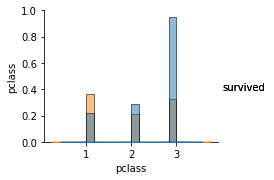

In [10]:
#Visualise the distribution of the numeerical features
plot = sns.pairplot(titanic_complete[['survived','pclass','age','fare','cabin']], hue = 'survived')
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)
plot.add_legend();

In [11]:
survived = titanic_complete[titanic_complete['survived']==1]
died = titanic_complete[titanic_complete['survived']==0]

print('Survived %i (%.1f%%)'%(len(survived),len(survived)/len(titanic_complete)*100))
print('Died %i (%.1f%%)'%(len(died),len(died)/len(titanic_complete)*100))
print('Total %i '%(len(titanic_complete)))

Survived 500 (38.2%)
Died 809 (61.8%)
Total 1309 


In [12]:
titanic_complete[['sex','survived']].groupby('sex').mean()

,survived
sex,
female,0.727468
male,0.190985


<AxesSubplot:xlabel='sex', ylabel='survived'>

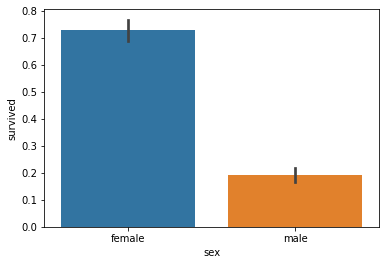

In [13]:
sns.barplot(x = 'sex', y = 'survived', data = titanic_complete)

In [14]:
titanic_complete[['embarked','survived']].groupby('embarked').mean()

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604
